In [17]:
# We continue playing around with F vs NF groups following week 9 meeting
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import random
warnings.filterwarnings("ignore")

data = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps7.3.fits',memmap=True)

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

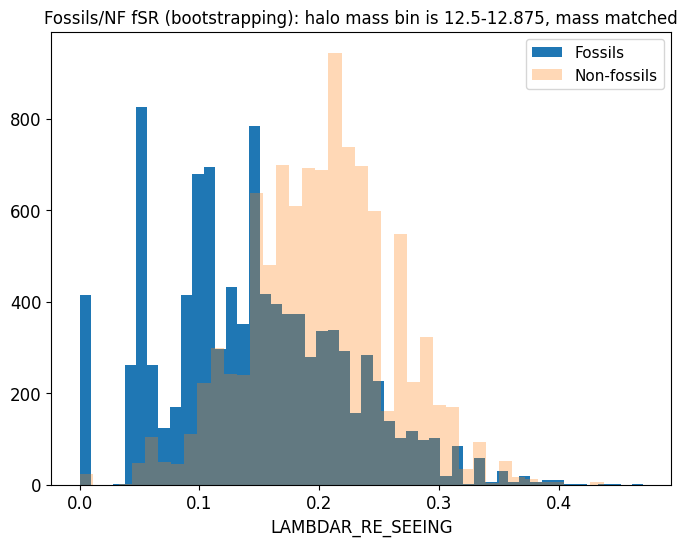

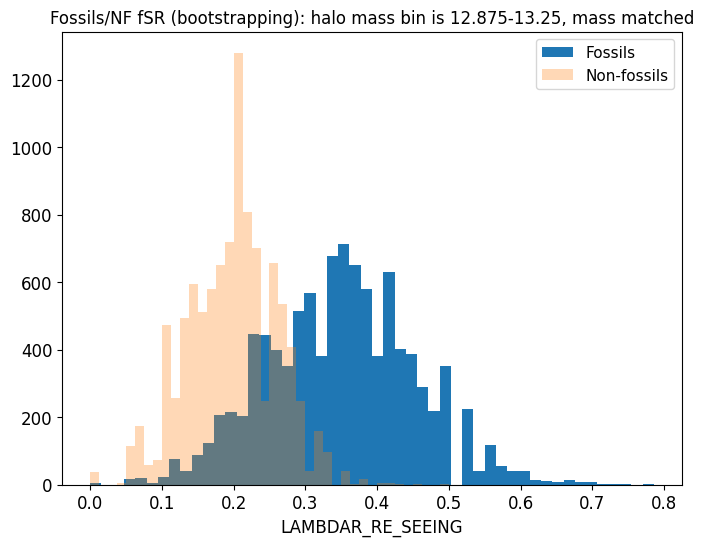

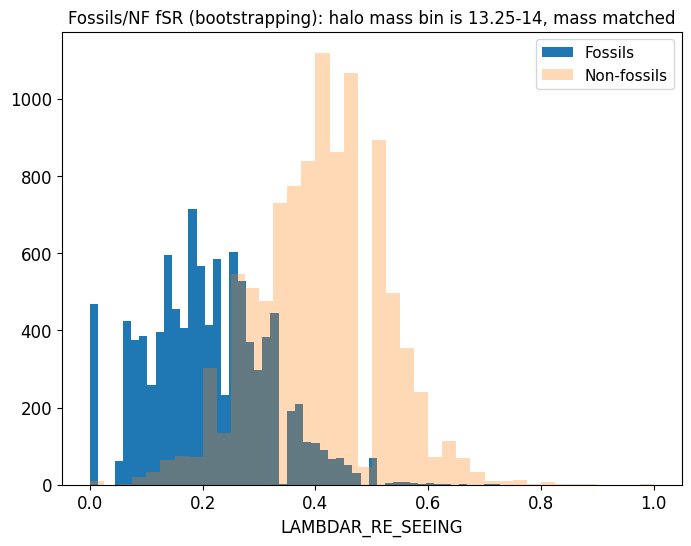

In [9]:
# separate F from NF, using different bins of halo mass (TO AVOID CORRELATIONS)
# USING SEEING CORRECTED SPINS
# our bins will be: 12.5-13, 13 - 13.5, 13.5-14

# now look at fraction of slow rotators (fSR)

# these are the halo mass cuts that we will bin our data into
haloMassCuts = [12.5,12.875,13.25,14]

meanmatchedfossilspins = [[],[],[],[],[],[]]
meanmatchedNFspins = [[],[],[],[],[],[]]
meanmatchedfossilerrors = [[],[],[],[],[],[]]
meanmatchedNFerrors = [[],[],[],[],[],[]]

SEMmatchedfossilspins = [[],[],[],[],[],[]]
SEMmatchedNFspins = [[],[],[],[],[],[]]
SEMmatchedfossilerrors = [[],[],[],[],[],[]]
SEMmatchedNFerrors = [[],[],[],[],[],[]]


# use bootstrapping!
N = len(data)

N_expts = 10000

for h in range(N_expts):

    fossilspins = []
    NFspins = []
    fossilmasses = []
    NFmasses = []
    fossilmassgaps = []
    NFmassgaps = []
    fossilerrors = []
    NFerrors = []

    matchedfossilspins = []
    matchedNFspins = []
    matchedfossilmasses = []
    matchedNFmasses = []
    matchedfossilmassgaps = []
    matchedNFmassgaps = []
    matchedfossilerrors = []
    matchedNFerrors = []

    # indices that we will select (identical to sampling with replacement)
    indices = np.random.randint(N, size = N) 

    # loop over our halo mass bins
    for i in range(1,len(haloMassCuts)):
        fossilspins.append([])
        NFspins.append([])
        fossilmasses.append([])
        NFmasses.append([])
        fossilmassgaps.append([])
        NFmassgaps.append([])
        fossilerrors.append([])
        NFerrors.append([])

        matchedfossilspins.append([])
        matchedNFspins.append([])
        matchedfossilmasses.append([])
        matchedNFmasses.append([])
        matchedfossilmassgaps.append([])
        matchedNFmassgaps.append([])
        matchedfossilerrors.append([])
        matchedNFerrors.append([])


        # now loop over our galaxies and divide them into F and NF AND the right bin!
        for j in indices:

            if haloMassCuts[i-1] < data['log(MassA)'][j] < haloMassCuts[i] and data['ROTATOR_CAT_SEEING'][j] != -999:       

                if data['m1-IntMean'][j] > 0.97:              
                    fossilspins[i-1].append(data['ROTATOR_CAT_SEEING'][j])
                    fossilmasses[i-1].append(data['m1'][j])
                    fossilmassgaps[i-1].append(data['m1-IntMean'][j])
                else:
                    NFspins[i-1].append(data['ROTATOR_CAT_SEEING'][j])
                    NFmasses[i-1].append(data['m1'][j])
                    NFmassgaps[i-1].append(data['m1-IntMean'][j])

        # set mass match maximum difference (in dex)
        maxdiff = 0.15
        NFindicesshuffled = np.linspace(0,len(NFmasses[i-1])-1,len(NFmasses[i-1]),dtype=int)
        random.shuffle(NFindicesshuffled)
        
        # run through the fossils, shuffle first
        for j in range(len(fossilmasses[i-1])):

            # run through the NF's until we find one that is within maxdiff dex of our F and
            # is not an NF that we've matched yet
            
            for k in NFindicesshuffled:
                if (abs(fossilmasses[i-1][j] - NFmasses[i-1][k]) < maxdiff 
                and NFmasses[i-1][k] not in matchedNFmasses[i-1]):

                    matchedfossilspins[i-1].append(fossilspins[i-1][j])
                    matchedfossilmasses[i-1].append(fossilmasses[i-1][j])
                    matchedfossilmassgaps[i-1].append(fossilmassgaps[i-1][j])

                    matchedNFspins[i-1].append(NFspins[i-1][k])
                    matchedNFmasses[i-1].append(NFmasses[i-1][k])
                    matchedNFmassgaps[i-1].append(NFmassgaps[i-1][k])

                    # break out of this inner loop if we find a match and move on to the next fossil
                    break

        # calculate the fSR of each group
        
        if len(matchedfossilspins[i-1]) != 0 and len(matchedNFspins[i-1]) != 0:
            fossilSRs = 0
            for m in range(len(matchedfossilspins[i-1])):
                if matchedfossilspins[i-1][m] == 1:
                    fossilSRs += 1

            fossilfSR = fossilSRs/len(matchedfossilspins[i-1])

            NFSRs = 0
            for o in range(len(matchedNFspins[i-1])):
                if matchedNFspins[i-1][o] == 1:
                    NFSRs += 1

            NFfSR = NFSRs/len(matchedNFspins[i-1])           

            # store the result
            if ((str(matchedfossilspins[i-1])) != 'nan' and
            str(matchedNFspins[i-1]) != 'nan'):

                meanmatchedfossilspins[i-1].append(fossilfSR)         
                meanmatchedNFspins[i-1].append(NFfSR)
                
                
                

#         plt.figure(figsize=(8, 6), dpi=100)
#         plt.xlim([-0.1,2.75])
#         plt.ylim([-0.05,1.05])
#         fossilmeanplot = plt.plot([-1,3],[meanmatchedfossilspins[i-1],meanmatchedfossilspins[i-1]],'--b')
#         nfmeanplot = plt.plot([-1,3],[meanmatchedNFspins[i-1],meanmatchedNFspins[i-1]],'--r')
#         massgapcut = plt.plot([0.97,0.97],[-0.5,1.5],'k')
#         plt.legend(["Fossils mean spin","NF mean spin","Mass gap cut"])                                     
#         fossilsplot = plt.scatter(matchedfossilmassgaps[i-1],matchedfossilspins[i-1],c=matchedfossilmasses[i-1],cmap='plasma',vmin=9.6,vmax=11.4)
#         nfplot = plt.scatter(matchedNFmassgaps[i-1],matchedNFspins[i-1],c=matchedNFmasses[i-1],cmap='plasma',vmin=9.6,vmax=11.4)
#         plt.title("Comparing Fossils/Non-fossils: halo mass bin is {}-{}, mass matched".format(haloMassCuts[i-1],haloMassCuts[i]))
#         plt.xlabel("Mass gap (dex(Msun))")
#         plt.ylabel("Spin")
#         cbar = plt.colorbar()
#         cbar.set_label('Stellar mass (dex(MSun))')
#         plt.show()


for i in range(3):
    plt.figure(figsize=(8, 6), dpi=100)
    fossilmeanhist = plt.hist(meanmatchedfossilspins[i],bins=50)
    NFmeanhist = plt.hist(meanmatchedNFspins[i],bins=40,alpha=0.3)
    plt.xlabel("LAMBDAR_RE_SEEING")
    plt.title("Fossils/NF fSR (bootstrapping): halo mass bin is {}-{}, mass matched".format(haloMassCuts[i],haloMassCuts[i+1]))
    plt.legend(["Fossils","Non-fossils"])
    plt.show()
    
#     # save the plot
#     filename = "/suphys/fscu5535/python_scripts/figures/FossilNonFossilSpinMeansHaloMassBin{}-{}.png".format(haloMassCuts[i-1],haloMassCuts[i])
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
#     plt.clf()
    

In [67]:
print(matchedfossilspins[i-1])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]


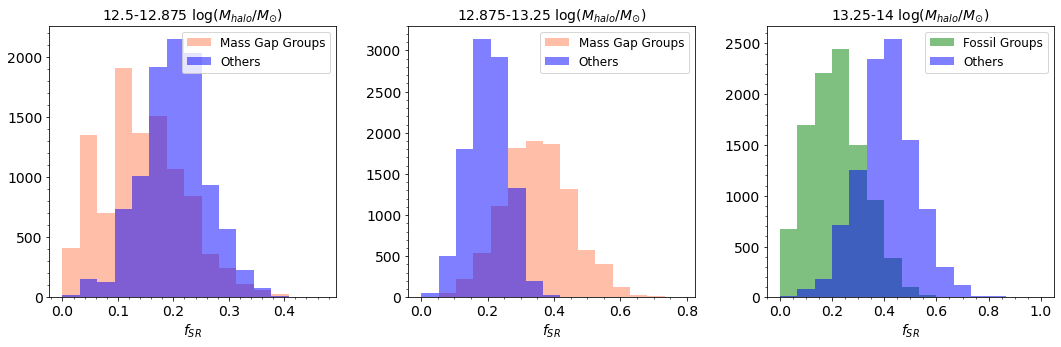

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, gridspec_kw={'wspace' : 0.25}, figsize=(18,5))

i=0
bins=np.histogram(np.hstack((meanmatchedfossilspins[i],meanmatchedNFspins[i])), bins=15)[1] #get the bin edges
ax1.hist(meanmatchedfossilspins[i],bins,alpha=0.5,color='coral')
ax1.hist(meanmatchedNFspins[i],bins,alpha=0.5,color='b')
ax1.set_xlabel(r"$f_{SR}$")
ax1.set_title(r"{}-{} log$(M_{{halo}}/M_{{\odot}})$".format(haloMassCuts[i],haloMassCuts[i+1]))
ax1.legend(["Mass Gap Groups","Others"])
ax1.minorticks_on()

i=1
bins=np.histogram(np.hstack((meanmatchedfossilspins[i],meanmatchedNFspins[i])), bins=15)[1] #get the bin edges
ax2.hist(meanmatchedfossilspins[i],bins,alpha=0.5,color='coral')
ax2.hist(meanmatchedNFspins[i],bins,alpha=0.5,color='b')
ax2.set_xlabel(r"$f_{SR}$")
ax2.set_title(r"{}-{} log$(M_{{halo}}/M_{{\odot}})$".format(haloMassCuts[i],haloMassCuts[i+1]))
ax2.legend(["Mass Gap Groups","Others"])
ax2.minorticks_on()

i=2        
bins=np.histogram(np.hstack((meanmatchedfossilspins[i],meanmatchedNFspins[i])), bins=15)[1] #get the bin edges
ax3.hist(meanmatchedfossilspins[i],bins,alpha=0.5,color='g')
ax3.hist(meanmatchedNFspins[i],bins,alpha=0.5,color='b')
ax3.set_xlabel(r"$f_{SR}$")
ax3.set_title(r"{}-{} log$(M_{{halo}}/M_{{\odot}})$".format(haloMassCuts[i],haloMassCuts[i+1]))
ax3.legend(["Fossil Groups","Others"])
ax3.minorticks_on()
    
        
        
filename = "/suphys/fscu5535/python_scripts/figures/fsrbootstrappingpdfs.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

              
        

In [13]:
for i in range(3):
    plt.figure(figsize=(8, 6), dpi=100)
    
    if i <= 1:
        bins=np.histogram(np.hstack((meanmatchedfossilspins[i],meanmatchedNFspins[i])), bins=15)[1] #get the bin edges
        fossilmeanhist = plt.hist(meanmatchedfossilspins[i],bins,alpha=0.5,color='coral')
        NFmeanhist = plt.hist(meanmatchedNFspins[i],bins,alpha=0.5,color='b')
        plt.xlabel(r"f$_{SR}$")
        plt.title(r"{}-{} log(M$_{{halo}}$/M$_{{\odot}}$)".format(haloMassCuts[i],haloMassCuts[i+1]))
        plt.legend(["Mass Gap Group","Other"])
        plt.minorticks_on()
               
    else:
        bins=np.histogram(np.hstack((meanmatchedfossilspins[i],meanmatchedNFspins[i])), bins=15)[1] #get the bin edges
        fossilmeanhist = plt.hist(meanmatchedfossilspins[i],bins,alpha=0.5,color='g')
        NFmeanhist = plt.hist(meanmatchedNFspins[i],bins,alpha=0.5,color='b')
        plt.xlabel(r"f$_{SR}$")
        plt.title(r"{}-{} log(M$_{{halo}}$/M$_{{\odot}}$)".format(haloMassCuts[i],haloMassCuts[i+1]))
        plt.legend(["Fossil Group","Other"])
        plt.minorticks_on()
               
        
    filename = "/suphys/fscu5535/python_scripts/figures/FsrHaloMassBin{}-{}.png".format(haloMassCuts[i],haloMassCuts[i+1])
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    plt.clf()
    

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [42]:
import scipy as sp
for i in range(5):
    print(sp.stats.kstest(meanmatchedfossilspins[i],meanmatchedNFspins[i]))


KstestResult(statistic=0.4381, pvalue=0.0)
KstestResult(statistic=0.8198, pvalue=0.0)
KstestResult(statistic=0.1113, pvalue=2.472032383021569e-54)
KstestResult(statistic=0.45914591459145915, pvalue=0.0)
KstestResult(statistic=0.11654888724818058, pvalue=1.7595696370860165e-56)


0.10759181218082975
0.11203800273904306
0.10417287273050359
0.061464678554534455
0.07623666957743477
0.06000839046604868


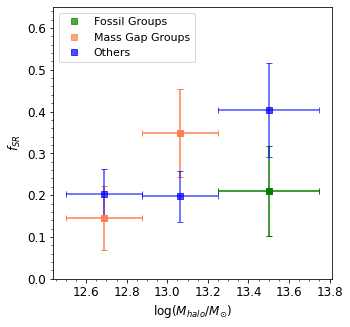

In [14]:
# plot the above
halomasspoints = [12.6875,13.0625,13.5]
halomassbins = np.array([0.1875,0.1875,0.25])

fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
dummy=[]
ax.errorbar(dummy,dummy,fmt='s',c='g',alpha=0.7,label="Fossil Groups")
ax.errorbar(dummy,dummy,fmt='s',c='coral',alpha=0.7,label="Mass Gap Groups")
ax.errorbar(dummy,dummy,fmt='s',c='b',alpha=0.7,label="Others")
ax.legend(loc='upper left')

for i in [2,1,0]:
    fossilmean = np.mean(meanmatchedfossilspins[i])
    fossilspinerror = np.std(meanmatchedfossilspins[i])
    print(fossilspinerror)
    
    NFmean = np.mean(meanmatchedNFspins[i])
    NFspinerror = np.std(meanmatchedNFspins[i])
    print(NFspinerror)
    
    if i <= 1:
        fossilserror = ax.errorbar(halomasspoints[i],fossilmean,yerr=fossilspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='coral')
        nonfossilerrors = ax.errorbar(halomasspoints[i], NFmean,yerr=NFspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='b', alpha = 0.7)
    else:
        fossilserror = ax.errorbar(halomasspoints[i],fossilmean,yerr=fossilspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='g')
        nonfossilerrors = ax.errorbar(halomasspoints[i], NFmean,yerr=NFspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='b', alpha = 0.7)

ax.set_xlabel(r"log$(M_{halo}/M_{\odot})$")
ax.set_ylabel("$f_{SR}$")
ax.set_ylim(0,0.65)
ax.minorticks_on()


# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/fossilmggfsr.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

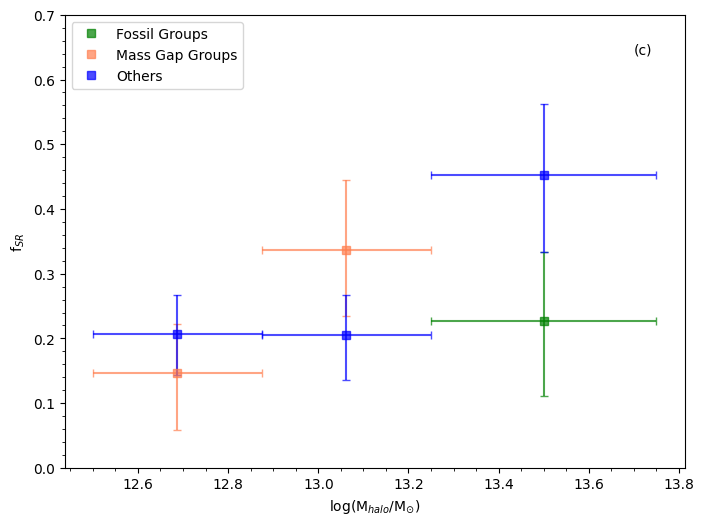

In [25]:
# plot the above
halomasspoints = [12.6875,13.0625,13.5]
halomassbins = np.array([0.1875,0.1875,0.25])

plt.figure(figsize=(8, 6), dpi=100)
dummy=[]
plt.errorbar(dummy,dummy,fmt='s',c='g',alpha=0.7,label="Fossil Groups")
plt.errorbar(dummy,dummy,fmt='s',c='coral',alpha=0.7,label="Mass Gap Groups")
plt.errorbar(dummy,dummy,fmt='s',c='b',alpha=0.7,label="Others")
plt.legend(loc='upper left')


for i in [2,1,0]:
    fossilmean = np.mean(meanmatchedfossilspins[i])
    fossilspinerror = np.zeros((2,1))
    fossilspinerror[0,0] = fossilmean - np.percentile(meanmatchedfossilspins[i],16)
    fossilspinerror[1,0] = np.percentile(meanmatchedfossilspins[i],84) - fossilmean
    
    NFmean = np.mean(meanmatchedNFspins[i])
    NFspinerror = np.zeros((2,1))
    NFspinerror[0,0] = NFmean - np.percentile(meanmatchedNFspins[i],16)
    NFspinerror[1,0] = np.percentile(meanmatchedNFspins[i],84) - NFmean
    
    if i == 2:
        fossilserror = plt.errorbar(halomasspoints[i],fossilmean,yerr=fossilspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='g',alpha=0.7)
        nonfossilerrors = plt.errorbar(halomasspoints[i], NFmean,yerr=NFspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='b', alpha = 0.7)
    if i == 1:
        fossilserror = plt.errorbar(halomasspoints[i],fossilmean,yerr=fossilspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='coral',alpha=0.7)
        nonfossilerrors = plt.errorbar(halomasspoints[i], NFmean,yerr=NFspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='b', alpha = 0.7)
    if i == 0:
        fossilserror = plt.errorbar(halomasspoints[i],fossilmean,yerr=fossilspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='coral',alpha=0.7)
        nonfossilerrors = plt.errorbar(halomasspoints[i], NFmean,yerr=NFspinerror, xerr=halomassbins[i],fmt='s',capsize=3,c='b', alpha = 0.7)
        
plt.xlabel(r"log(M$_{halo}$/M$_{\odot}$)")
plt.ylabel("f$_{SR}$")
plt.ylim(0,0.7)
plt.minorticks_on()
plt.text(13.7,0.64,'(c)')


# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/fossilmggfsr.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [3]:
test = [1,2,3,4,5,6,7,8,9]
random.shuffle(test)
print(test)

[4, 9, 1, 3, 6, 8, 7, 5, 2]


In [7]:
test = np.linspace(0,9,10)
print(test)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
